<a href="https://colab.research.google.com/github/mrnopeofficial/youtubetrendingvideo1718/blob/main/Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TYPE OF TRENDING YOUTUBE VIDEO IN FRANCE & UNITED KINGDOM (2017 & 2018)**
### By Syahmi

# **Data Loading**

In [ ]:
#importing libraries for data manipulation
import numpy as np #library for numerical computing
import pandas as pd #library for data manipulation and analysis 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving YTvideos-DDM-KM.xlsx to YTvideos-DDM-KM.xlsx


In [ ]:
#loading and copying data from a file in collab folder named YT.xlsx into data frame called youtube_data
youtube_data=pd.read_excel('YTvideos-DC.xlsx')

#read the first 5 rows in the youtube_data
youtube_data.head()

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,description,country
0,2018-03-01,Iggy Azalea - Savior ft. Quavo,iggyazaleamusicVEVO,Music,2018-03-01,285984,34137,1626,4224,https://i.ytimg.com/vi/T3hXC5yNZOc/default.jpg,Music video by Iggy Azalea performing Savior. ...,France
1,2018-03-01,"The Omarosa Interview: Full, Uncut Version",The Late Show with Stephen Colbert,Entertainment,2018-03-01,181985,2578,780,1787,https://i.ytimg.com/vi/-Ul3Mjk2YYU/default.jpg,Watch Colbert's full interview with former Whi...,France
2,2018-03-01,"The Daily Show With Trevor Noah - February 28,...",TheWorldwiteweb,People & Blogs,2018-03-01,118956,1132,76,169,https://i.ytimg.com/vi/YNhMPl6blT0/default.jpg,The Daily Show With Trevor Noah 2/28/18 | Ben ...,France
3,2018-03-01,à®¸à¯à®°à¯€à®¤à¯‡à®µà®¿ à®•à®£à®µà®°à¯ à®‰à®...,New Bharathi Studio,Entertainment,2018-03-01,205901,633,122,61,https://i.ytimg.com/vi/CT8O547MycY/default.jpg,à®Žà®™à¯à®•à®³à¯ à®•à¯‚à®•à¯à®²à¯ + à®²à®¿...,France
4,2018-03-02,Naps (Ft. Alonzo) - Dans Le Block (Clip Officiel),Naps Officiel,Music,2018-03-01,463970,28555,695,1289,https://i.ytimg.com/vi/n4ov9wxloNw/default.jpg,Naps (Ft. Alonzo) - Dans Le Block (Clip Offici...,France


In [ ]:
#loading and copying data from a file in collab folder named YTcluster.xlsx into data frame called youtube_data_cluster
youtube_data_cluster=pd.read_excel('YTvideos-DDM-KM.xlsx')

#read the first 5 rows in the youtube_data
youtube_data_cluster.head()

,category_id,views,likes,dislikes,comment_count,country,id,cluster
0,2,285984,34137,1626,4224,1,1,cluster_0
1,3,181985,2578,780,1787,1,2,cluster_0
2,1,118956,1132,76,169,1,3,cluster_0
3,3,205901,633,122,61,1,4,cluster_0
4,2,463970,28555,695,1289,1,5,cluster_2


In [ ]:
youtube_data

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,description,country
0,2018-03-01,Iggy Azalea - Savior ft. Quavo,iggyazaleamusicVEVO,Music,2018-03-01,285984,34137,1626,4224,https://i.ytimg.com/vi/T3hXC5yNZOc/default.jpg,Music video by Iggy Azalea performing Savior. ...,France
1,2018-03-01,"The Omarosa Interview: Full, Uncut Version",The Late Show with Stephen Colbert,Entertainment,2018-03-01,181985,2578,780,1787,https://i.ytimg.com/vi/-Ul3Mjk2YYU/default.jpg,Watch Colbert's full interview with former Whi...,France
2,2018-03-01,"The Daily Show With Trevor Noah - February 28,...",TheWorldwiteweb,People & Blogs,2018-03-01,118956,1132,76,169,https://i.ytimg.com/vi/YNhMPl6blT0/default.jpg,The Daily Show With Trevor Noah 2/28/18 | Ben ...,France
3,2018-03-01,à®¸à¯à®°à¯€à®¤à¯‡à®µà®¿ à®•à®£à®µà®°à¯ à®‰à®...,New Bharathi Studio,Entertainment,2018-03-01,205901,633,122,61,https://i.ytimg.com/vi/CT8O547MycY/default.jpg,à®Žà®™à¯à®•à®³à¯ à®•à¯‚à®•à¯à®²à¯ + à®²à®¿...,France
4,2018-03-02,Naps (Ft. Alonzo) - Dans Le Block (Clip Officiel),Naps Officiel,Music,2018-03-01,463970,28555,695,1289,https://i.ytimg.com/vi/n4ov9wxloNw/default.jpg,Naps (Ft. Alonzo) - Dans Le Block (Clip Offici...,France
...,...,...,...,...,...,...,...,...,...,...,...,...
6818,2018-06-14,Liam Gallagher - I've All I Need (Official Video),Liam Gallagher,People & Blogs,2018-05-25,381741,12108,204,1216,https://i.ytimg.com/vi/LftOOM6qlJ4/default.jpg,Liam Gallagher - I've All I Need (Official Vid...,UK
6819,2018-06-14,A Tick Out Of You | House M.D.,House M.D.,Entertainment,2018-05-23,253060,3048,43,211,https://i.ytimg.com/vi/FjqBekVMwjQ/default.jpg,House is convinced that his patient is sufferi...,UK
6820,2018-06-14,GIANT 15 POUND LOBSTER MUKBANG! ë¨¹ë°© (EATING...,Kim Thai,People & Blogs,2018-05-20,369844,8343,749,1857,https://i.ytimg.com/vi/8nWw8q3zEpw/default.jpg,WHERE I BOUGHT THIS 15 POUND LOBSTER: https://...,UK
6821,2018-06-14,Disney : PROOF Your SJW Staff Hates Star Wars,Alex Becker's Channel,People & Blogs,2018-05-21,108395,8335,316,2398,https://i.ytimg.com/vi/6ULbkqAuo48/default.jpg,"I Put Lower Subbed Channels Up Front, Go Drop ...",UK


In [ ]:
#get descriptive summary (count, mean, std, min, quartiles and max) of youtube_data
youtube_data.describe()

,views,likes,dislikes,comment_count
count,6823.000000,6823.000000,6823.000000,6823.000000
mean,398022.677561,13843.008940,563.597391,1563.399678
std,250917.720532,17124.893372,1039.566851,2236.416337
min,100053.000000,91.000000,8.000000,3.000000
25%,184661.000000,2900.000000,168.000000,397.000000
50%,324995.000000,7275.000000,310.000000,855.000000
75%,570616.500000,18999.000000,591.500000,1780.000000
max,999966.000000,176713.000000,28372.000000,31749.000000


In [ ]:
#read data types
youtube_data.dtypes

trending_date     datetime64[ns]
title                     object
channel_title             object
category_id               object
publish_time      datetime64[ns]
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
description               object
country                   object
dtype: object

In [ ]:
#print the nmber of missing data in each columns
column_names = youtube_data.columns
for column in column_names:
    print(column + ' - ' + str(youtube_data[column].isnull().sum()))

trending_date - 0
title - 0
channel_title - 0
category_id - 0
publish_time - 0
views - 0
likes - 0
dislikes - 0
comment_count - 0
thumbnail_link - 0
description - 325
country - 0


# **Data Visualization**

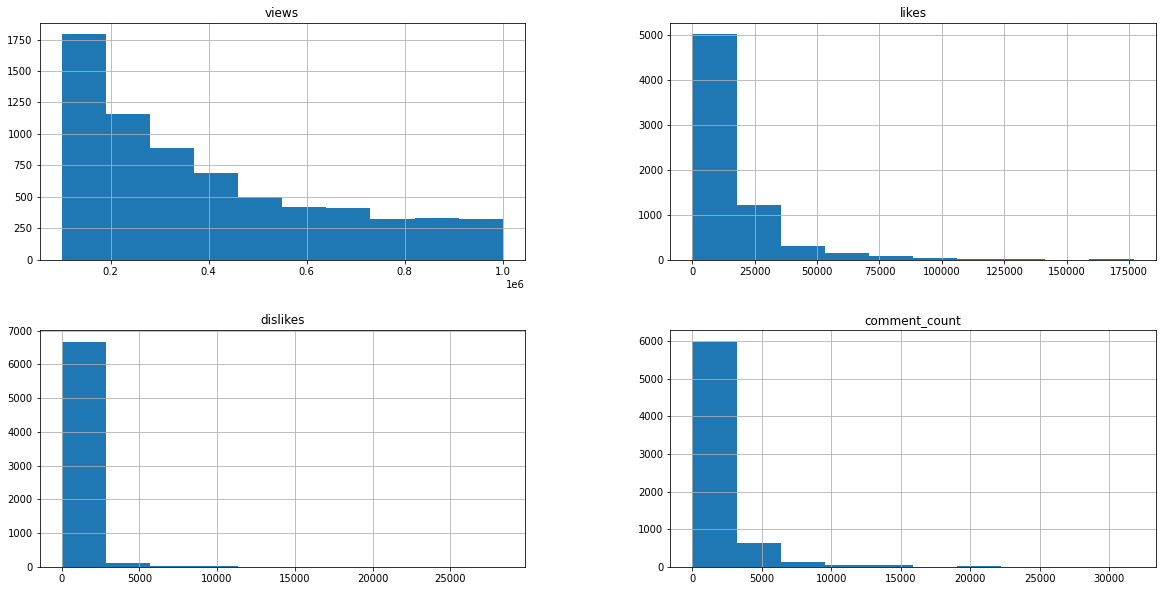

In [ ]:
import matplotlib.pyplot as plt
# histograms
youtube_data.hist(figsize=(20, 10))
plt.show()

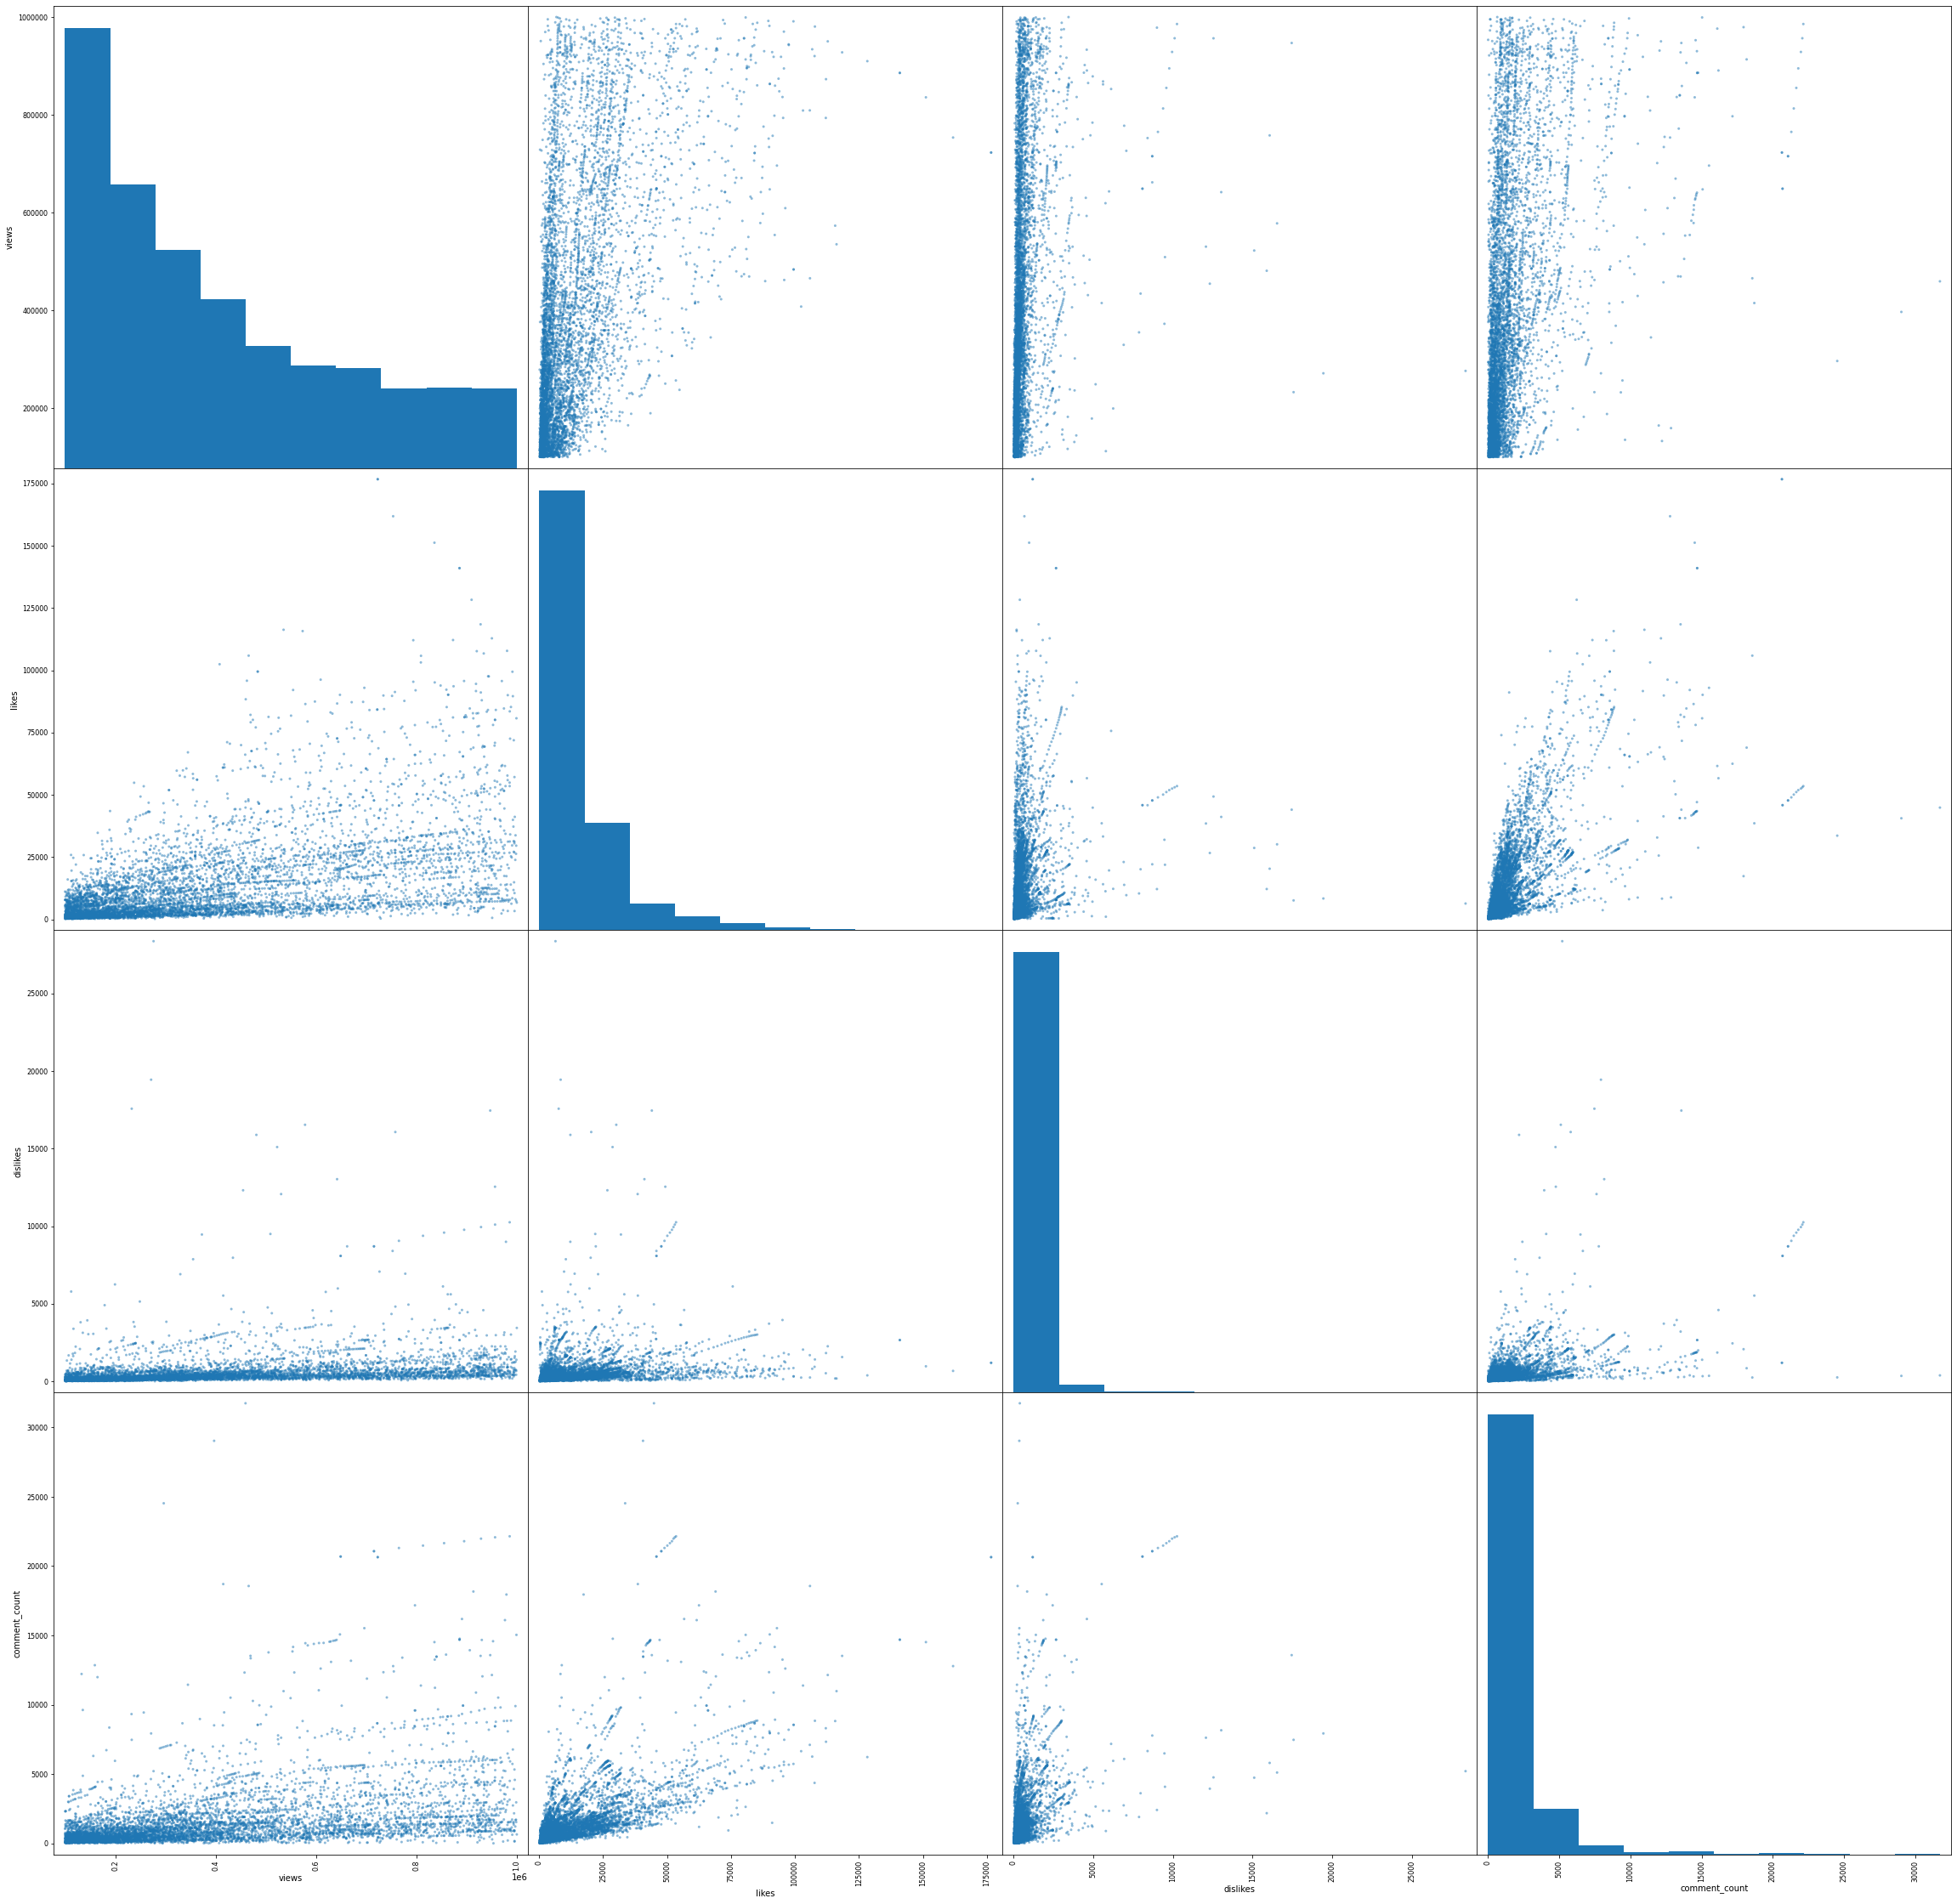

In [ ]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(youtube_data, figsize=(40, 40))
plt.show()

# **Data Pre-Processing**

In [ ]:
#exclude columns
youtube_data.drop(['trending_date', 'title', 'channel_title', 'publish_time', 'thumbnail_link', 'description' ],axis=1,inplace=True)

youtube_data

,category_id,views,likes,dislikes,comment_count,country
0,Music,285984,34137,1626,4224,France
1,Entertainment,181985,2578,780,1787,France
2,People & Blogs,118956,1132,76,169,France
3,Entertainment,205901,633,122,61,France
4,Music,463970,28555,695,1289,France
...,...,...,...,...,...,...
6818,People & Blogs,381741,12108,204,1216,UK
6819,Entertainment,253060,3048,43,211,UK
6820,People & Blogs,369844,8343,749,1857,UK
6821,People & Blogs,108395,8335,316,2398,UK


In [ ]:
youtube_data = youtube_data.replace({"country":  {"France":1,"UK":2}})
youtube_data

,category_id,views,likes,dislikes,comment_count,country
0,Music,285984,34137,1626,4224,1
1,Entertainment,181985,2578,780,1787,1
2,People & Blogs,118956,1132,76,169,1
3,Entertainment,205901,633,122,61,1
4,Music,463970,28555,695,1289,1
...,...,...,...,...,...,...
6818,People & Blogs,381741,12108,204,1216,2
6819,Entertainment,253060,3048,43,211,2
6820,People & Blogs,369844,8343,749,1857,2
6821,People & Blogs,108395,8335,316,2398,2


In [ ]:
youtube_data = youtube_data.replace({"category_id":  {"Entertainment":1,"Music":2,"People & Blogs":3}})
youtube_data

,category_id,views,likes,dislikes,comment_count,country
0,2,285984,34137,1626,4224,1
1,1,181985,2578,780,1787,1
2,3,118956,1132,76,169,1
3,1,205901,633,122,61,1
4,2,463970,28555,695,1289,1
...,...,...,...,...,...,...
6818,3,381741,12108,204,1216,2
6819,1,253060,3048,43,211,2
6820,3,369844,8343,749,1857,2
6821,3,108395,8335,316,2398,2


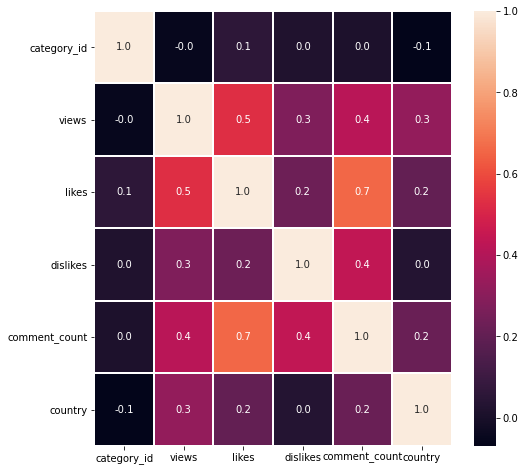

In [ ]:
import seaborn as sns
#data.describe()
youtube_data.corr()
f,ax = plt.subplots(figsize=(8,8)) #this command create 8x8 subplot
sns.heatmap(youtube_data.corr(),annot=True, linewidths=1, fmt= '.1f',ax=ax) #user seaborn library for virtualization
plt.show()

In [ ]:
youtube_data_cluster = youtube_data_cluster.replace({"cluster":  {"cluster_0":0,"cluster_1":1,"cluster_2":2}})
youtube_data_cluster

,category_id,views,likes,dislikes,comment_count,country,id,cluster
0,2,285984,34137,1626,4224,1,1,0
1,3,181985,2578,780,1787,1,2,0
2,1,118956,1132,76,169,1,3,0
3,3,205901,633,122,61,1,4,0
4,2,463970,28555,695,1289,1,5,2
...,...,...,...,...,...,...,...,...
6818,1,381741,12108,204,1216,2,6819,2
6819,3,253060,3048,43,211,2,6820,0
6820,1,369844,8343,749,1857,2,6821,2
6821,1,108395,8335,316,2398,2,6822,0


# **HyperParameter Tuning**

### First Technique : Hyperopt

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Lets split the data into train and test set
X = youtube_data.iloc[:,:-1]
y = youtube_data.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import StandardScaler 
# standardize the feature variables 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In [ ]:
# define objective function

def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X_scaled, y,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [ ]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

  1%|          | 1/100 [00:12<20:18, 12.31s/it, best loss: -0.9988460146961587]


KeyboardInterrupt: ignored

In [ ]:
trials.results

In [ ]:
trials.losses()

In [ ]:
trials.statuses()

### Second Technique : Optuna

In [ ]:
pip install optuna

In [ ]:

# import packages 
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler 
import joblib 

import optuna 
from optuna.samplers import TPESampler


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# define the search space and the objecive function


def objective(trial):
    # Define the search space
    criterions = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depths = trial.suggest_int('max_depth', 1, 9, 1)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, 100)

    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 criterion=criterions,
                                 max_depth=max_depths,
                                 n_jobs=-1)
    score = cross_val_score(clf, X_scaled, y, scoring="accuracy").mean()

    return score

In [ ]:
# create a study object 

study = optuna.create_study(study_name="randomForest_optimization",
                            direction="maximize",
                            sampler=TPESampler())

In [ ]:
# pass the objective function to method optimize()

study.optimize(objective, n_trials=10)

In [ ]:
print(study.best_params)

In [ ]:
print(study.best_value)

In [ ]:
optuna.visualization.plot_optimization_history(study)

### Hyper-Parameter Tuning on LRM

In [ ]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

# output
Fitting 10 folds for each of 180 candidates, totalling 1800 fits

[Parallel(n_jobs=4)]: Done 351 tasks      | elapsed:    2.6s
[LibLinear]
[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:    4.4s finished

### Hyper-Parameter Tuning on LDA

In [ ]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

# output
Fitting 10 folds for each of 3 candidates, totalling 30 fits

[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.9s finished

### Hyper-Parameter Tuning on SVC

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

# output
Fitting 10 folds for each of 30 candidates, totalling 300 fits

[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.3s finished

# **Decscriptive Machine Learning Model**

# K-Means

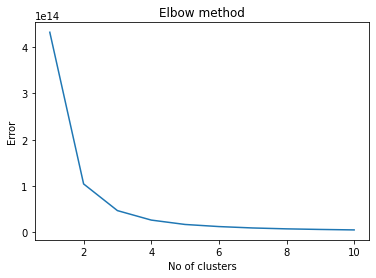

In [ ]:
x = youtube_data.iloc[:, [0, 1, 2, 3, 4, 5]].values

#USING ELBOW METHOD to identify the best k-value
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
#let us predict using kmeans=3
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 ... 2 0 2]


array([[1.67720024e+00, 1.93760653e+05, 6.32455523e+03, 3.16628470e+02,
        7.71907856e+02, 1.27288836e+00],
       [1.59515571e+00, 8.03014254e+05, 2.85232464e+04, 9.96541869e+02,
        3.03924152e+03, 1.66574394e+00],
       [1.57630522e+00, 4.51445563e+05, 1.59738027e+04, 6.69336345e+02,
        1.83819880e+03, 1.47791165e+00]])

In [ ]:
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist

#points = youtube_data.drop('category_id', axis=1)
points = youtube_data[['category_id',	'views',	'likes',	'dislikes',	'comment_count',	'country']]
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
youtube_data['cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=youtube_data.index)
youtube_data = pd.concat([youtube_data, dists], axis=1)
print(youtube_data)

      category_id   views  likes  ...         dist_0         dist_1         dist_2
0               2  285984  34137  ...   96396.624492  166475.336723  517062.469756
1               1  181985   2578  ...   12407.570472  269793.360327  621572.284700
2               3  118956   1132  ...   74987.466549  332825.369708  684613.073861
3               1  205901    633  ...   13428.518063  246030.344750  597772.313399
4               2  463970  28555  ...  271123.024547   17760.921485  339048.907148
...           ...     ...    ...  ...            ...            ...            ...
6818            3  381741  12108  ...  188069.851394   69816.002252  421597.636575
6819            1  253060   3048  ...   59393.079243  198813.852529  550552.066421
6820            3  369844   8343  ...  176098.789287   81957.616458  433641.753352
6821            3  108395   8335  ...   85404.805343  343136.238449  694913.194306
6822            2  607552  18271  ...  413964.276415  156124.391263  195738.947555

[68

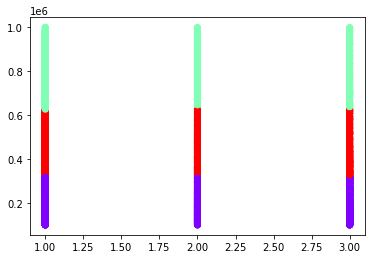

In [ ]:
#visualizing clustering
plt.scatter(x[:,0], x[:,1],c=y_kmeans3, cmap='rainbow')

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

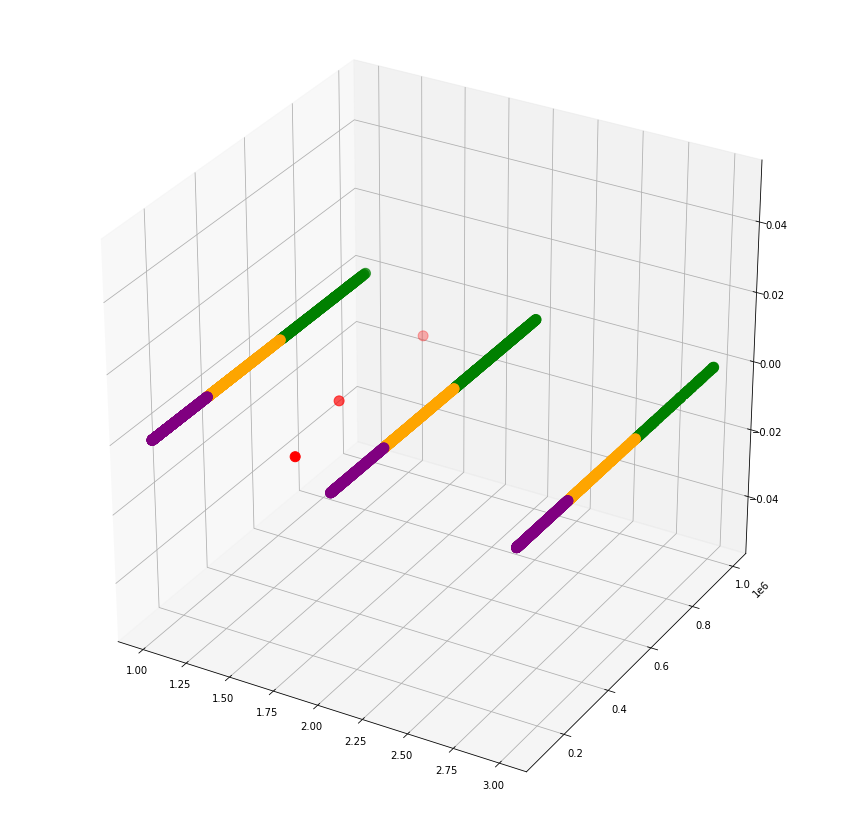

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

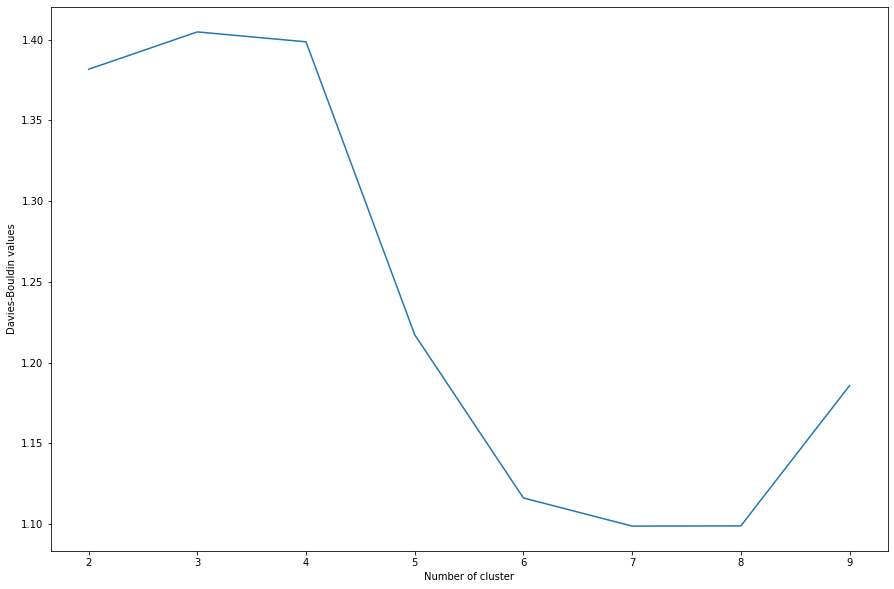

In [ ]:
# normalize data
X = youtube_data.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)


sse,db,slc = {}, {}, {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X,clusters)

plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

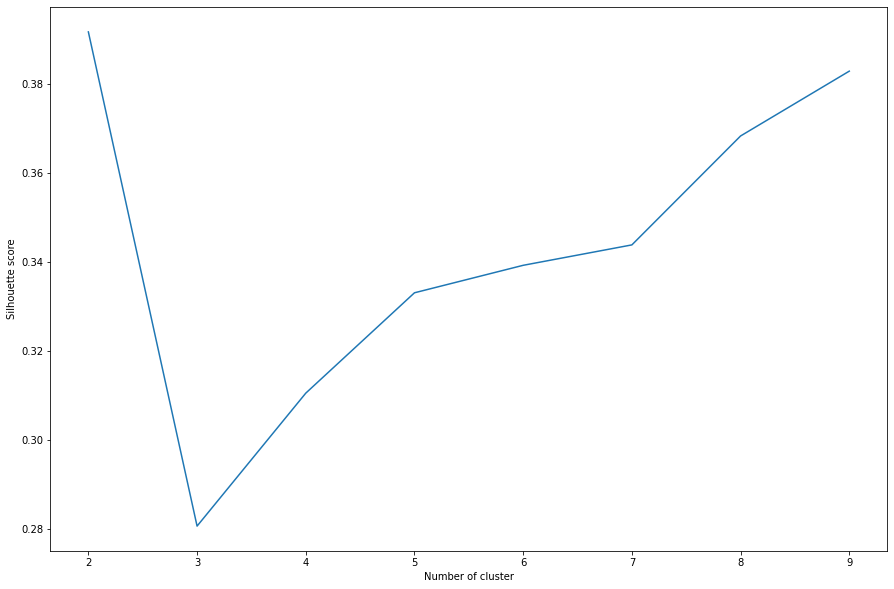

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5301449803908878
For n_clusters = 3 The average silhouette_score is : 0.4996305579329786
For n_clusters = 4 The average silhouette_score is : 0.4915564685301324
For n_clusters = 5 The average silhouette_score is : 0.49160398298065433
For n_clusters = 6 The average silhouette_score is : 0.5019494672411106
For n_clusters = 7 The average silhouette_score is : 0.41513698487054684
For n_clusters = 8 The average silhouette_score is : 0.41546277312954233
For n_clusters = 9 The average silhouette_score is : 0.42719037041624824


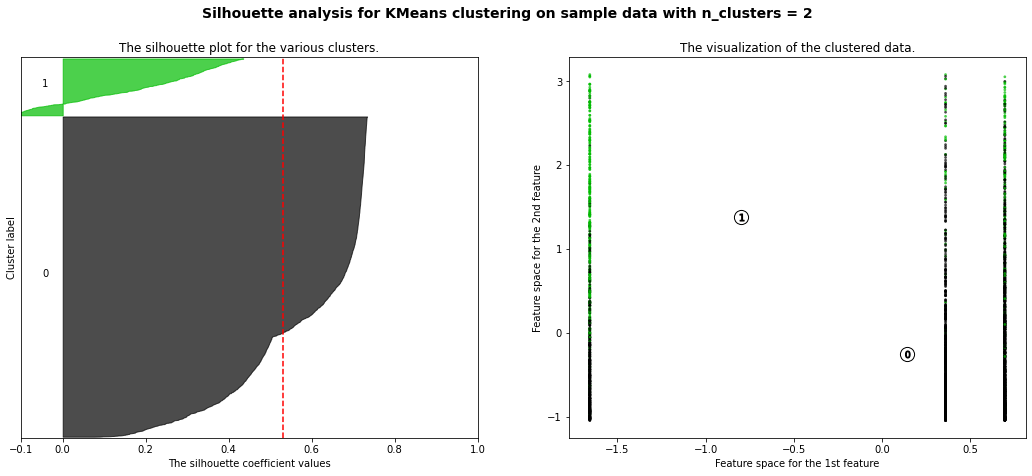

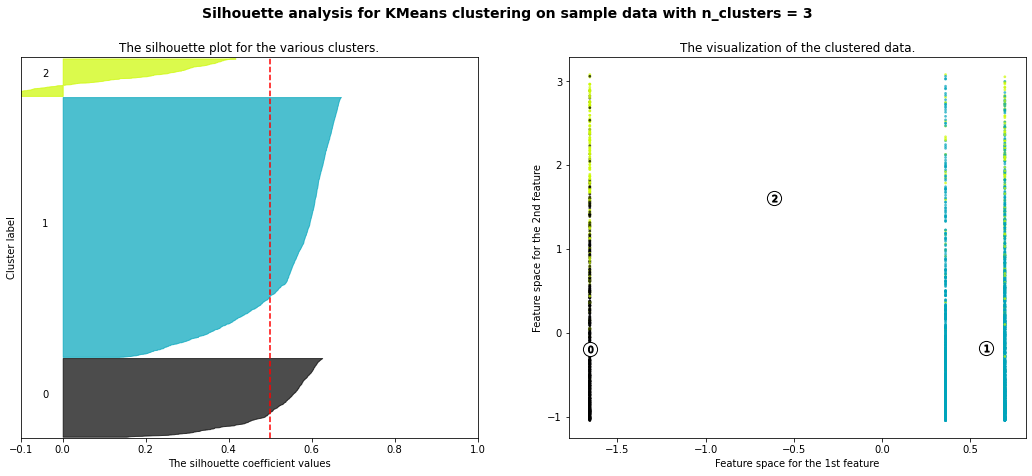

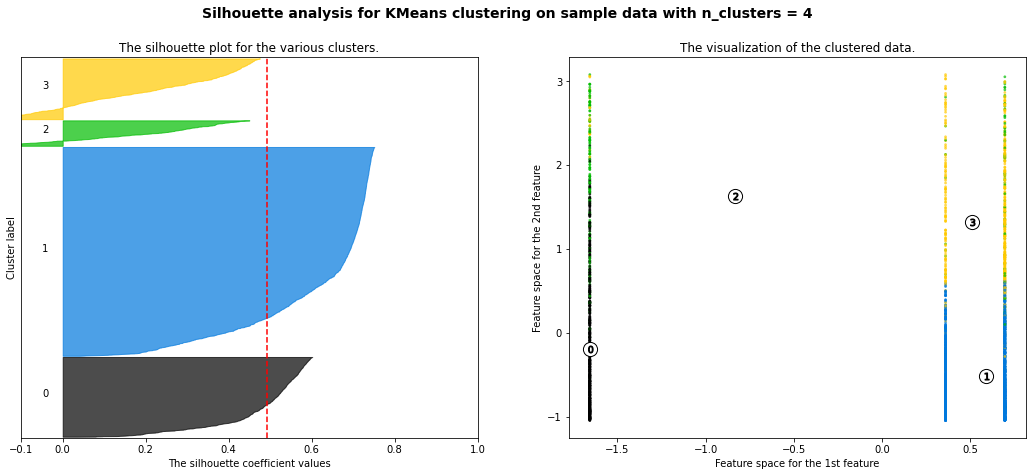

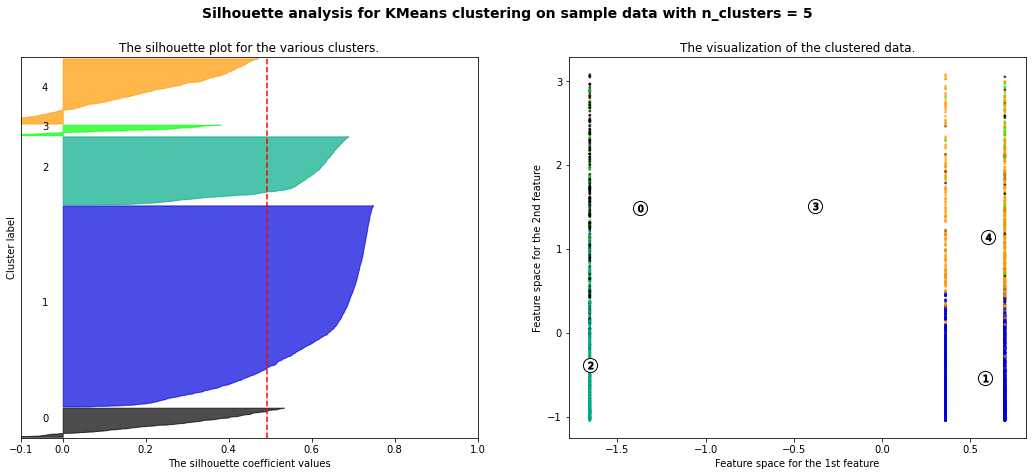

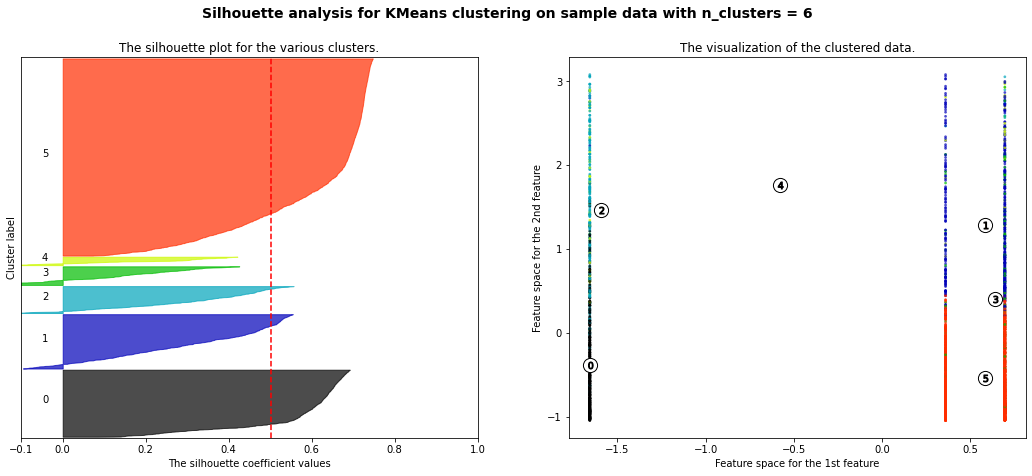

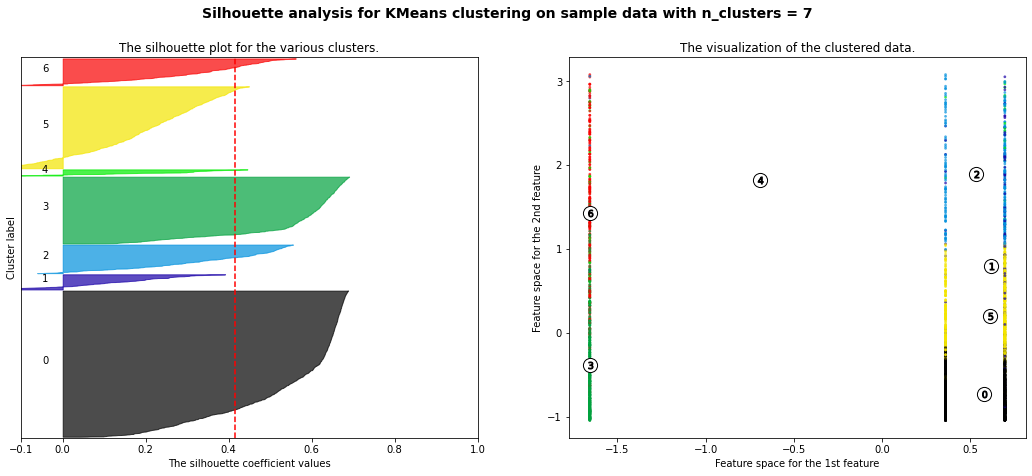

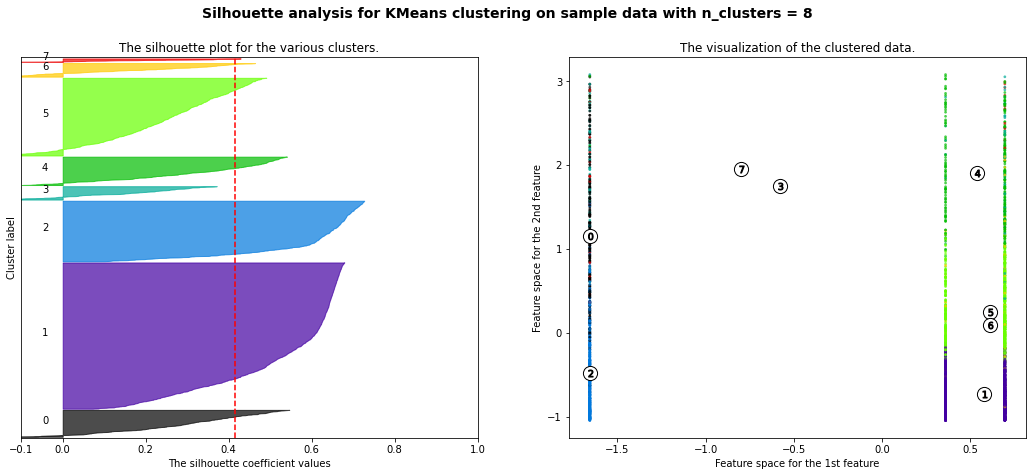

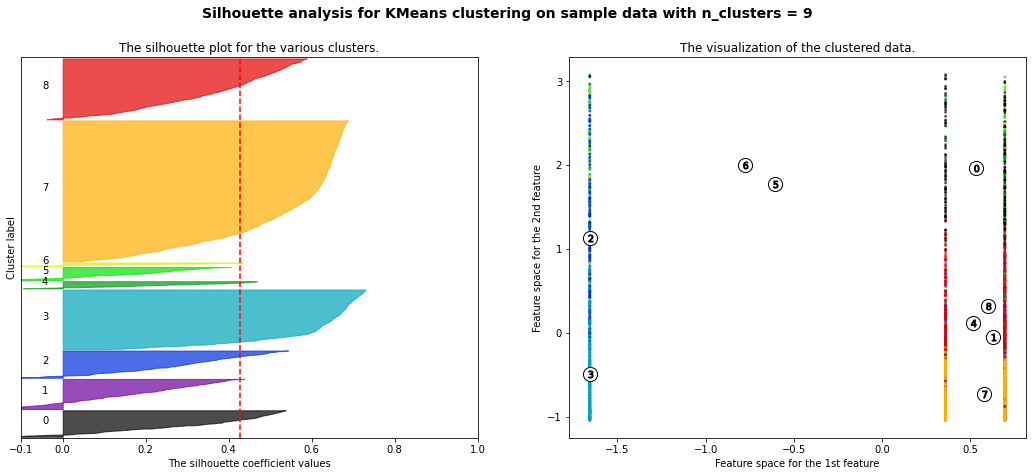

In [ ]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Agglomerative Clustering

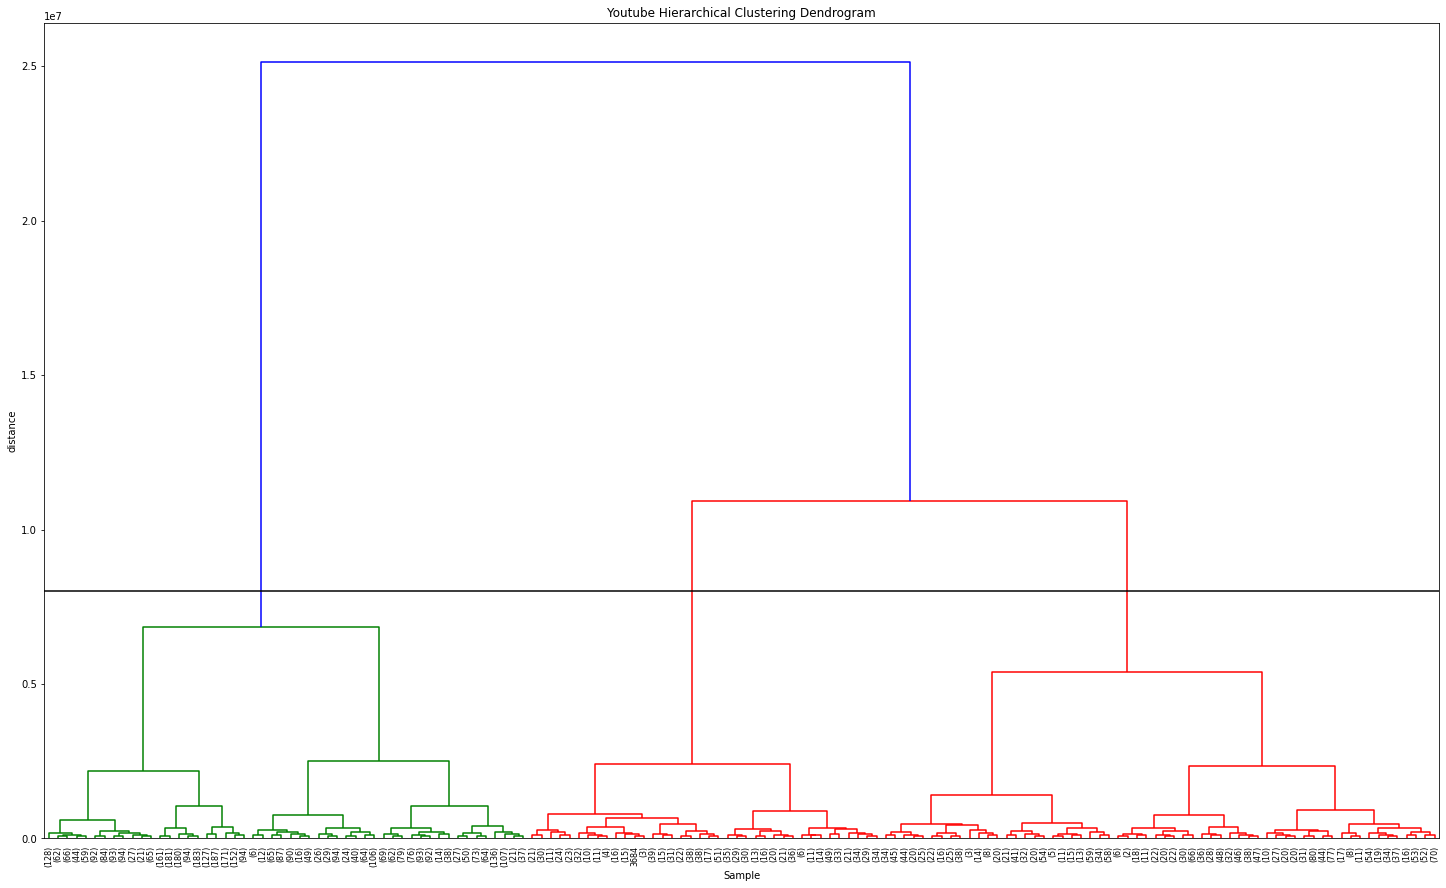

In [ ]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(youtube_data, 'ward')

# set cut-off to 150
max_d = 0.8 * 10 ** 7               # max_d as in max_distance

plt.figure(figsize=(25, 15))
plt.title('Youtube Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(youtube_data)

array([0, 0, 0, ..., 0, 0, 1])

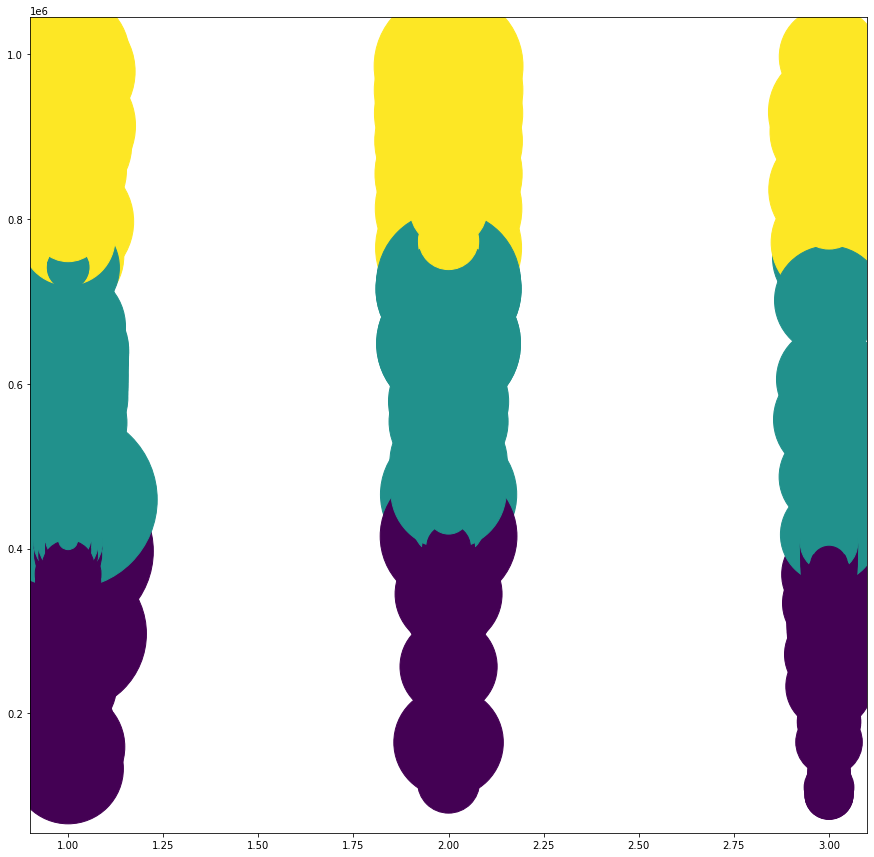

In [ ]:
import matplotlib. pyplot as plt
plt.figure(figsize=(15,15))  
plt.scatter(youtube_data['category_id'], youtube_data['views'], youtube_data['comment_count'], c=cluster.labels_)

# **Predictive Machine Learning Model**

In [ ]:
#import the classifier
from sklearn import metrics
## Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
## Import Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB 
## Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
## Import kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
## Import logistic regression Classifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#Lets split the data into train and test set
X = youtube_data_cluster.iloc[:,:-1]
y = youtube_data_cluster.iloc[:, -1].values

###  Option 1 : 70% Training and 30% Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Option 2 : 50% Training and 50% Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

###  Option 3 : 30% Training and 70% Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 0)

# Random Forest

### Before Hyperparameter Tuning

In [ ]:
RandomF = RandomForestClassifier()
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)
#print('Random Forest Model:')
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for Random Forest = {:.2f}%'.format(accuracy))
print('Classification Error for Random Forest = {:.2f}%'.format(100 - accuracy))

Accuracy for Random Forest = 99.85%
Classification Error for Random Forest = 0.15%


### HyperParameter Tuning on Random Forest

In [ ]:
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)
K_fold = StratifiedKFold(n_splits=10)
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  4.8min finished


In [ ]:
gsRFC.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

### After Hyperparameter Tuning

In [ ]:
RandomF = RandomForestClassifier(criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, 
                                 n_estimators= 200)
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)
#print('Random Forest Model:')
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for Random Forest = {:.2f}%'.format(accuracy))
print('Classification Error for Random Forest = {:.2f}%'.format(100 - accuracy))

Accuracy for Random Forest = 99.85%
Classification Error for Random Forest = 0.15%


# Naive Bayes

### Before Hyperparameter Tuning

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for Naive Bayes = {:.2f}%'.format(accuracy))
print('Classification Error for Naive Bayes = {:.2f}%'.format(100 - accuracy))

Accuracy for Naive Bayes = 90.57%
Classification Error for Naive Bayes = 9.43%


### HyperParameter Tuning on Naive Bayes

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X)

gs_NB.fit(Data_transformed, y);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.6s finished


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.0001}

### After Hyperparameter Tuning

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB(priors=None, var_smoothing= 0.0001)
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for Naive Bayes = {:.2f}%'.format(accuracy))
print('Classification Error for Naive Bayes = {:.2f}%'.format(100 - accuracy))

Accuracy for Naive Bayes = 94.41%
Classification Error for Naive Bayes = 5.59%


# k-NN

### Before Hyperparameter Tuning

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for kNN = {:.2f}%'.format(accuracy))
print('Classification Error for kNN = {:.2f}%'.format(100 - accuracy))

Accuracy for kNN = 99.80%
Classification Error for kNN = 0.20%


### HyperParameter Tuning on k-NN

In [ ]:
import numpy as np
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [ ]:
gs_KNN.fit(X, y);
gs_KNN.best_params_

Fitting 15 folds for each of 21 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:  1.5min finished


{'n_neighbors': 7, 'p': 2}

### After Hyperparameter Tuning

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 7, p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for kNN = {:.2f}%'.format(accuracy))
print('Classification Error for kNN = {:.2f}%'.format(100 - accuracy))

Accuracy for kNN = 99.73%
Classification Error for kNN = 0.27%


# SVM

In [ ]:
#now we can build a classifier model

#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

In [ ]:
#check the accuracy of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[1037    0    1]
 [   0  402    0]
 [   1    0  606]]
Accuracy: 99.94 %
Standard Deviation: 0.13 %


# Decision Tree

In [ ]:
#lets try with another classifier: DecisionTreeClassifier
mod_dt =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state = 1, splitter='best')
mod_dt.fit(X_train,y_train)
y_pred=mod_dt.predict(X_test)
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for Decision Tree = {:.2f}%'.format(accuracy))
print('Classification Error for Decision Tree = {:.2f}%'.format(100 - accuracy))

Accuracy for Decision Tree = 99.85%
Classification Error for Decision Tree = 0.15%


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


# Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = (metrics.accuracy_score(y_pred,y_test))
accuracy = accuracy * 100
print('Accuracy for Logistic Regression = {:.2f}%'.format(accuracy))
print('Classification Error for Logistic Regression = {:.2f}%'.format(100 - accuracy))

Accuracy for Logistic Regression = 55.54%
Classification Error for Logistic Regression = 44.46%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Lets compare several machine learning models

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn (on training set)
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.576642 (0.031639)
LDA: 0.977384 (0.007598)
KNN: 0.997486 (0.002054)
CART: 0.998953 (0.001047)
NB: 0.922317 (0.013727)
SVM: 0.492045 (0.002612)
RF: 0.999581 (0.000838)


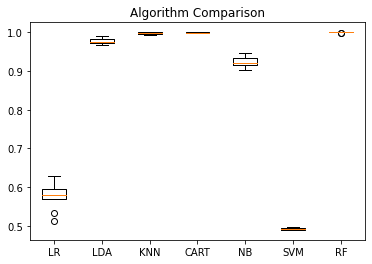

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5080605764533463
[[1038    0    0]
 [ 402    0    0]
 [ 605    0    2]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1038
           1       0.00      0.00      0.00       402
           2       1.00      0.00      0.01       607

    accuracy                           0.51      2047
   macro avg       0.50      0.33      0.23      2047
weighted avg       0.55      0.51      0.34      2047



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


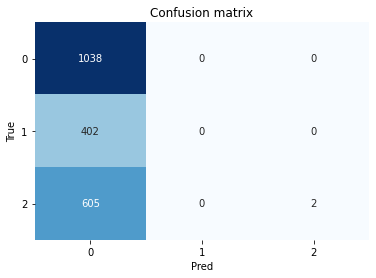

In [ ]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predictions, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# References
HyperParameter Tuning : https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/

https://www.codementor.io/@innat_2k14/kaggl-titanic-a-machine-learning-from-disaster-modelling-part-2-10gfjtm0p3

Clustering (davies bouldin index, silhoutte analysis): https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/

Agglomerative Clustering :https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/